[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gsg213/Computer_Vision_DL/blob/master/intro_to_img_proc/SIFT_and_Stitching.ipynb)

In [ ]:
# using OpenCV 4.4.0 in order to be able to use SIFT algorithm
!pip install opencv-contrib-python==4.4.0.44

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#patch for imshow
from google.colab.patches import cv2_imshow
print(cv2.__version__)

dir_path = 'img/'


4.4.0


# SIFT

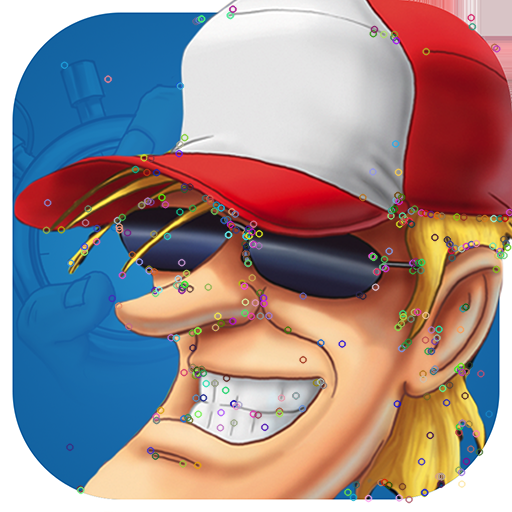

In [ ]:
img = cv2.imread("javierimage.png")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Create and detect SIFT keypoints
sift = cv2.SIFT.create()
kp = sift.detect(img_gray,None)

#draw keypoints
img_kp = cv2.drawKeypoints(img,kp,None)
cv2_imshow(img_kp)

368


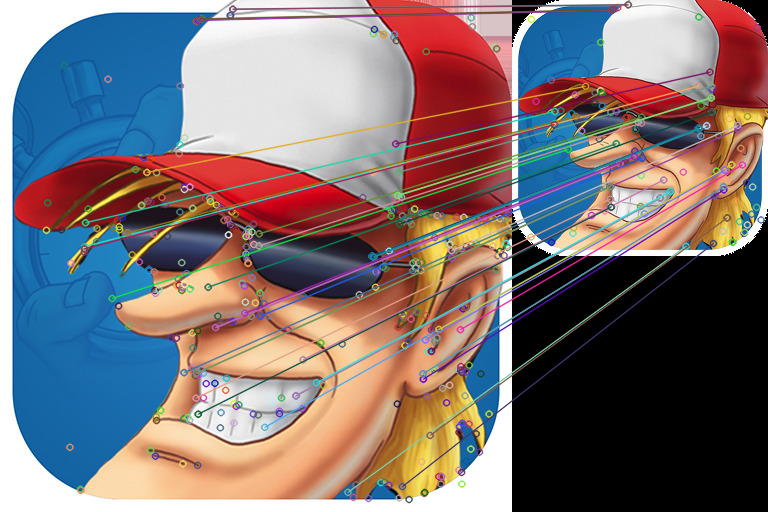

In [ ]:
img = cv2.imread(dir_path+"javierimage.png")
img2 = cv2.imread(dir_path+"javierimage_escala.png")

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#Create and detect SIFT keypoints
sift = cv2.SIFT.create()

#detect kp for both images
kp,des1 = sift.detectAndCompute(img_gray,None)
kp2,des2 = sift.detectAndCompute(img2_gray,None)

fbm = cv2.BFMatcher(cv2.NORM_L2,crossCheck = True)
matches = fbm.match(des1,des2)
matches = sorted(matches,key = lambda x:x.distance)

print(len(des1))

#draw keypoints
res = cv2.drawMatches(img, kp, img2, kp2, matches[:50], None)
cv2_imshow(res)

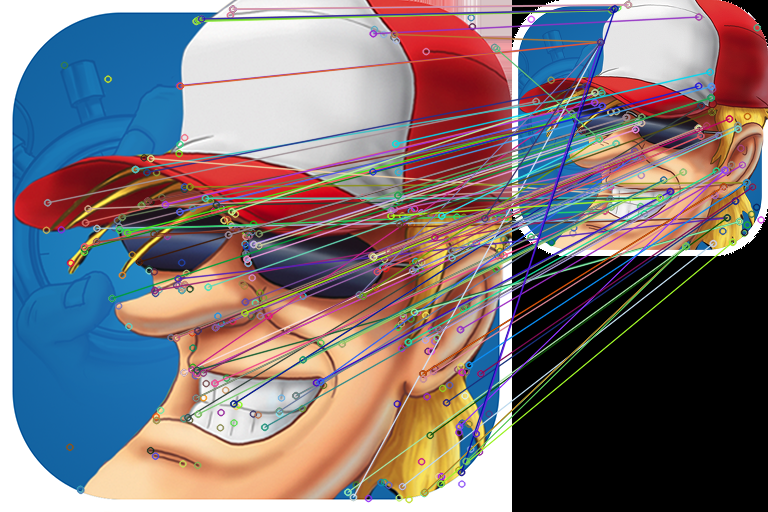

In [ ]:
img = cv2.imread(dir_path+"javierimage.png")
img2 = cv2.imread(dir_path+"javierimage_escala.png")

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#Create and detect SIFT keypoints
sift = cv2.SIFT.create()

#detect kp for both images
kp,des1 = sift.detectAndCompute(img_gray,None)
kp2,des2 = sift.detectAndCompute(img2_gray,None)

fbm = cv2.BFMatcher(cv2.NORM_L2)
matches = fbm.knnMatch(des1,des2,k=2)

matches_good = []

for m,n in matches:
  if m.distance < 0.85*n.distance:
    matches_good.append(m)


#draw keypoints
res = cv2.drawMatches(img, kp, img2, kp2, matches_good, None)
cv2_imshow(res)

# Stitching

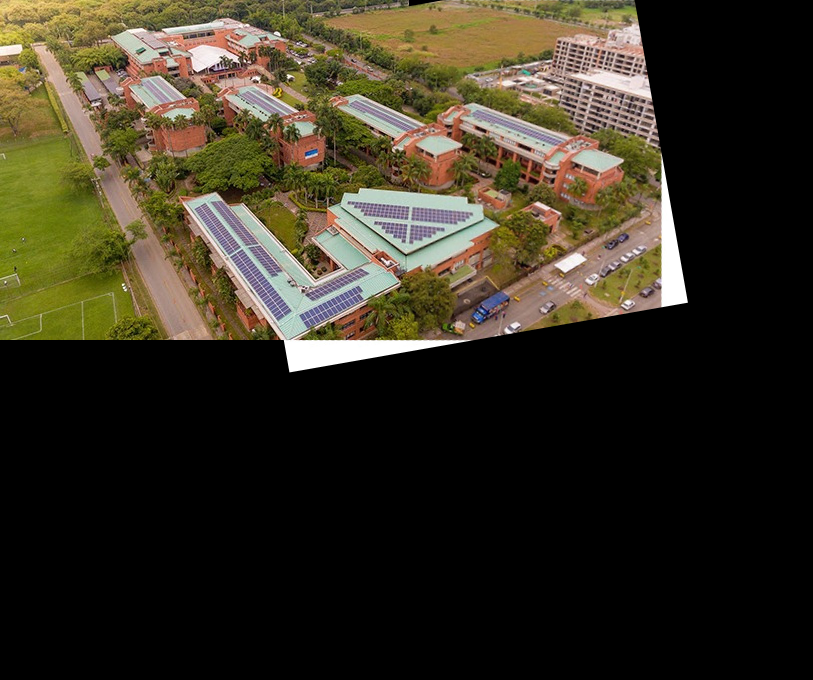

In [ ]:
img = cv2.imread(dir_path+"uao_1.jpeg")
img2 = cv2.imread(dir_path+"uao_2rot.jpeg")

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#Create and detect SIFT keypoints
sift = cv2.SIFT.create()

#detect kp for both images
kp1,des1 = sift.detectAndCompute(img_gray,None)
kp2,des2 = sift.detectAndCompute(img2_gray,None)

flann_params = dict(algorithm = 1 ,trees=5 )
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(flann_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

matches_good = []

for m,n in matches:
  if m.distance < 0.75*n.distance:
    matches_good.append(m)

#res = cv2.drawMatches(img, kp, img2, kp2, matches_good, None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#cv2_imshow(res)

MIN_MATCH_COUNT=10

if len(matches_good)>MIN_MATCH_COUNT:
  src_pts = np.float32([kp1[m.queryIdx].pt for m in matches_good]).reshape(-1,1,2)
  dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches_good]).reshape(-1,1,2)
  H, status = cv2.findHomography(dst_pts,src_pts,cv2.RANSAC,5.0)
  width = img2_gray.shape[1] + img_gray.shape[1]
  height = img2_gray.shape[0] + img_gray.shape[0]
  result = cv2.warpPerspective(img2, H , (width, height))
  result[0:img.shape[0],0:img.shape[1]] = img
  cv2_imshow(result)